In [11]:
#lets first read in the data from the cleaned csv file
import pandas as pd

df = pd.read_csv('insurance_claims_cleaned_fixed.csv')


Claim Circumstances
-------------------
authorities_contacted, police_report_available, 
property_damage, bodily_injuries, witnesses
→ These can indicate suspicious or unusual claim circumstances.

In [17]:
counts = df.groupby('authorities_contacted')['fraud_reported'].value_counts()
counts

authorities_contacted     fraud_reported
Ambulance                 No                139
                          Yes                57
Fire                      No                163
                          Yes                60
No Authorities Contacted  No                 85
                          Yes                 6
Other                     No                135
                          Yes                63
Police                    No                231
                          Yes                61
Name: count, dtype: int64

Column names in plot_data: ['No', 'Yes']


<Figure size 1000x600 with 0 Axes>

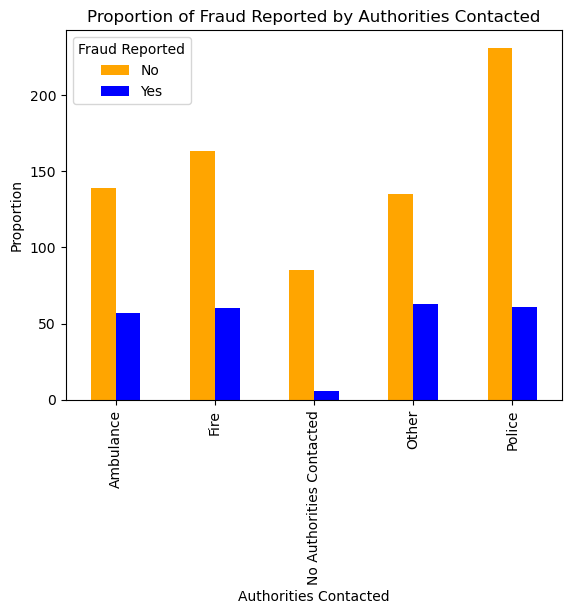

In [18]:
import matplotlib.pyplot as plt

# Print the actual column names to debug color mapping
print("Column names in plot_data:", plot_data.columns.tolist())

# Define custom colors: 'Yes' as blue, 'No' as orange
custom_colors = {'Yes': 'blue', 'No': 'orange', 'Y': 'blue', 'N': 'orange'}  # covers both possible encodings

# Prepare data for plotting
plot_data = counts.unstack() if hasattr(counts, 'unstack') else counts

# Get the order of columns to match colors
col_order = plot_data.columns.tolist()
colors = [custom_colors.get(col, 'gray') for col in col_order]

plt.figure(figsize=(10, 6))
ax = plot_data.plot(kind='bar', stacked=False, color=colors)
plt.xlabel('Authorities Contacted')
plt.ylabel('Proportion')
plt.title('Proportion of Fraud Reported by Authorities Contacted')
plt.legend(title='Fraud Reported', labels=[col for col in col_order])
plt.show()


Most claims are not fraudulent, regardless of authority. It is not sufficient on its own to predict fraud. 

In [14]:
#Now lets look at police reports and fraud
df.groupby('police_report_available')['fraud_reported'].value_counts(normalize=True)


police_report_available  fraud_reported
No                       No                0.749271
                         Yes               0.250729
Unknown                  No                0.740525
                         Yes               0.259475
Yes                      No                0.770701
                         Yes               0.229299
Name: proportion, dtype: float64